# Motor Control Bench Test Procedure

This notebook covers the following functionality:

1. Tachometers.
2. Arm/disarm and manual motor control.
3. Speed measurement.
4. PID motor control.


In [1]:
%load_ext autoreload
%autoreload 2

## Vehicle part identification and orientation conventions

![img](../Documentation/Assets/RoverInTestBenchTopView.jpeg)

### Connection to vehicle

Find which port is the vehicle connected to.
In linux, usually it is ttyACM0, ttyACM1, ...

In [2]:
!ls /dev/ttyACM*

/dev/ttyACM0


In [3]:
from rover.vehicleif import VehicleIF
vehicle = VehicleIF("/dev/ttyACM0", 115200,debug=False)
vehicle.capture_path = "./captures"

For a quick health check, see current telemetry state:

In [4]:
vehicle.print_telemetry()

General Telemetry
   TelemetryCycle: 194
   OnBoardTime: 116785
   ReceivedPackets: 4
   GeneralStatus: 0x01030000
   Debug1: 0x00000000
   Debug2: 0x00000000
Motor Telemetry
   TelemetryCycle: 194
   OnBoardTime: 116985
   Throttle1: 0.0
   Throttle2: 0.0
   Tachometer1: 4320
   Tachometer2: 4050
   Tachometer3: 0
   Tachometer4: 0
   MeasuredSpeed1: 0.0
   MeasuredSpeed2: 0.0
   MeasuredSpeed3: 0.0
   MeasuredSpeed4: 0.0
   SetpointSpeed1: 0.0
   SetpointSpeed2: 0.0
   StatusFlags: 0x00000000


For a quick command test, turn on and off led.

In [5]:
# Led on
vehicle.control_led(0x00000001)

Sent: 0x 40 3C 05 00 00 00 00 01 A2 0A  (10 bytes)


In [6]:
# Led off
vehicle.control_led(0x00000000)

Sent: 0x 40 3C 05 00 00 00 00 00 93 0A  (10 bytes)


## Procedure

### 1. Tachometer readings

**Preconditions**

- Reset the vehicle to ensure all tachometer readings are at zero.

In [7]:
vehicle.print_telemetry()

General Telemetry
   TelemetryCycle: 205
   OnBoardTime: 123385
   ReceivedPackets: 6
   GeneralStatus: 0x01000000
   Debug1: 0x00000000
   Debug2: 0x00000000
Motor Telemetry
   TelemetryCycle: 204
   OnBoardTime: 123185
   Throttle1: 0.0
   Throttle2: 0.0
   Tachometer1: 4320
   Tachometer2: 4050
   Tachometer3: 0
   Tachometer4: 0
   MeasuredSpeed1: 0.0
   MeasuredSpeed2: 0.0
   MeasuredSpeed3: 0.0
   MeasuredSpeed4: 0.0
   SetpointSpeed1: 0.0
   SetpointSpeed2: 0.0
   StatusFlags: 0x00000000


Start logging telemetry.

In [13]:
vehicle.start_telemetry_csv_logging()

- Move wheel 1.
- Move wheel 2.
- Move wheel 3.
- Move wheel 4.

Stop logging telemetry.

In [14]:
vehicle.stop_telemetry_csv_logging()

In [10]:
!ls {vehicle.capture_path}

tctm.telemetry.GeneralTelemetry.csv  tctm.telemetry.MotorControlTelemetry.csv


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

motor_control_tm_df = pd.read_csv(os.path.join(vehicle.capture_path,"tctm.telemetry.MotorControlTelemetry.csv"))
motor_control_tm_df.head(5)

,TelemetryCycle,OnBoardTime,Throttle1,Throttle2,Tachometer1,Tachometer2,Tachometer3,Tachometer4,MeasuredSpeed1,MeasuredSpeed2,MeasuredSpeed3,MeasuredSpeed4,SetpointSpeed1,SetpointSpeed2,StatusFlags
0,7,4985,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,8,5385,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,8,5585,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,5985,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,9,6185,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


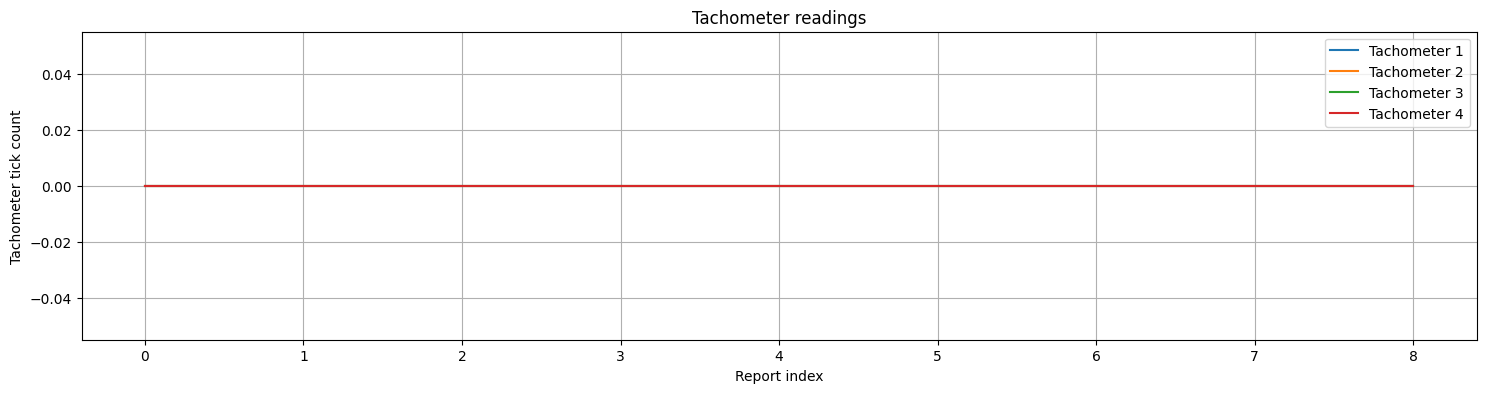

In [16]:
fig, axes = plt.subplots(1,1,figsize=(18,4))
axes.plot(motor_control_tm_df.Tachometer1)
axes.plot(motor_control_tm_df.Tachometer2)
axes.plot(motor_control_tm_df.Tachometer3)
axes.plot(motor_control_tm_df.Tachometer4)
axes.grid(which="Both")
axes.set_xlabel("Report index")
axes.set_ylabel("Tachometer tick count")
axes.legend(["Tachometer 1","Tachometer 2","Tachometer 3","Tachometer 4"])
axes.set_title("Tachometer readings");

### 2. Manual motor control

In [96]:
vehicle.print_telemetry()

General Telemetry
   TelemetryCycle: 605
   OnBoardTime: 363385
   ReceivedPackets: 70
   GeneralStatus: 0x01030000
   Debug1: 0x00000000
   Debug2: 0x00000000
Motor Telemetry
   TelemetryCycle: 604
   OnBoardTime: 363185
   Throttle1: 0.0
   Throttle2: 0.0
   Tachometer1: 3197
   Tachometer2: 3213
   Tachometer3: 0
   Tachometer4: 0
   MeasuredSpeed1: 0.0
   MeasuredSpeed2: 0.0
   MeasuredSpeed3: 0.0
   MeasuredSpeed4: 0.0
   SetpointSpeed1: 0.0
   SetpointSpeed2: 0.0
   StatusFlags: 0x00000000


In [159]:
vehicle.set_motor_control_mode(VehicleIF.MOTOR_MODE_ARM_MANUAL)

Sent: 0x 40 3C 05 03 00 00 00 01 E6 0A  (10 bytes)


In [249]:
TicksPerRevolution = 20
(60 * 1000) / TicksPerRevolution

3000.0

In [254]:
3000/270

11.11111111111111

In [247]:
vehicle.print_telemetry()

General Telemetry
   TelemetryCycle: 211
   OnBoardTime: 126984
   ReceivedPackets: 10
   GeneralStatus: 0x01010001
   Debug1: 0x00000000
   Debug2: 0x00000000
Motor Telemetry
   TelemetryCycle: 211
   OnBoardTime: 127184
   Throttle1: 0.23000000417232513
   Throttle2: 0.0
   Tachometer1: 1831
   Tachometer2: 2221
   Tachometer3: 0
   Tachometer4: 0
   MeasuredSpeed1: 269.0
   MeasuredSpeed2: 105.0
   MeasuredSpeed3: 0.0
   MeasuredSpeed4: 0.0
   SetpointSpeed1: 0.0
   SetpointSpeed2: 0.0
   StatusFlags: 0x00000001


Check vehicle right side moves forward.

In [211]:
vehicle.set_motor_throttles(0.23,0.0,0x1)

Sent: 0x 40 3C 0D 01 00 00 00 01 3E 6B 85 1F 00 00 00 00 EE 0A  (18 bytes)


Check vehicle right side moves backward.

In [21]:
vehicle.set_motor_throttles(-0.4,0.0,0x1)

Sent: 0x 40 3C 0D 01 00 00 00 01 BE CC CC CD 00 00 00 00 20 0A  (18 bytes)


Stop.

In [23]:
vehicle.set_motor_throttles(0.0,0.0,0x1)

Sent: 0x 40 3C 0D 01 00 00 00 01 00 00 00 00 00 00 00 00 D4 0A  (18 bytes)


Check vehicle left side moves backward.

In [24]:
vehicle.set_motor_throttles(0.0,0.5,0x2)

Sent: 0x 40 3C 0D 01 00 00 00 02 00 00 00 00 3F 00 00 00 FC 0A  (18 bytes)


Check vehicle left side moves backward.

In [25]:
vehicle.set_motor_throttles(0.0,-0.5,0x2)

Sent: 0x 40 3C 0D 01 00 00 00 02 00 00 00 00 BF 00 00 00 0D 0A  (18 bytes)


Both sides forward.

In [26]:
vehicle.set_motor_throttles(0.5,0.5,0x3)

Sent: 0x 40 3C 0D 01 00 00 00 03 3F 00 00 00 3F 00 00 00 51 0A  (18 bytes)


Both sides backward.

In [27]:
vehicle.set_motor_throttles(-0.5,-0.5,0x3)

Sent: 0x 40 3C 0D 01 00 00 00 03 BF 00 00 00 BF 00 00 00 62 0A  (18 bytes)


Disarm.

In [315]:
vehicle.set_motor_control_mode(VehicleIF.MOTOR_MODE_DISARM)

Sent: 0x 40 3C 05 03 00 00 00 00 D7 0A  (10 bytes)


### 3. Speed measurement

In [276]:
import numpy as np
import time

MIN_ABS_THROTTLE=0.0
MAX_ABS_THROTTLE=1.0
N_SAMPLES = 32
INTERVAL_IN_S = 1.0
SUSTAIN_INTERVAL_IN_S = 5.0
SIDE = "left" # left, right, or both

def do_motor_curve(vehicle, min_value, max_value, n_samples, interval, side):
    for throttle in np.linspace(min_value,max_value,n_samples):
        if side == 'left':
            vehicle.set_motor_throttles(throttle,0.0,0x1)
        elif side == 'right':
            vehicle.set_motor_throttles(0.0, throttle, 0x2)
        else:
            vehicle.set_motor_throttles(throttle,throttle,0x3)
        time.sleep(interval)

# Start logging
vehicle.start_telemetry_csv_logging()

# Arm 
vehicle.set_motor_control_mode(VehicleIF.MOTOR_MODE_ARM_MANUAL)
time.sleep(0.5)

# Ramp up
do_motor_curve(vehicle, MIN_ABS_THROTTLE, MAX_ABS_THROTTLE, N_SAMPLES, INTERVAL_IN_S, SIDE)
# Sustain
time.sleep(SUSTAIN_INTERVAL_IN_S)
# Ramp down
do_motor_curve(vehicle, MAX_ABS_THROTTLE, MIN_ABS_THROTTLE, N_SAMPLES, INTERVAL_IN_S, SIDE)
    
# Disarm
vehicle.set_motor_control_mode(VehicleIF.MOTOR_MODE_DISARM)

# Stop logging
vehicle.stop_telemetry_csv_logging()

Sent: 0x 40 3C 05 03 00 00 00 01 E6 0A  (10 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 00 00 00 00 00 00 00 00 D4 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3D 04 21 08 00 00 00 00 FB 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3D 84 21 08 00 00 00 00 47 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3D C6 31 8C 00 00 00 00 D3 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E 04 21 08 00 00 00 00 20 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E 25 29 4A 00 00 00 00 6A 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E 46 31 8C 00 00 00 00 B4 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E 67 39 CE 00 00 00 00 FE 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E 84 21 08 00 00 00 00 9C 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E 94 A5 29 00 00 00 00 B9 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E A5 29 4A 00 00 00 00 D6 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E B5 AD 6B 00 00 00 00 F3 0A  (18 bytes)
Sent: 0x 40 3C 0D 01 00 00 00 01 3E C6 31 8C 00 0

In [277]:
motor_control_tm_df = pd.read_csv(os.path.join(vehicle.capture_path,"tctm.telemetry.MotorControlTelemetry.csv"))
motor_control_tm_df["AverageSpeed12"] = (motor_control_tm_df.MeasuredSpeed1+ motor_control_tm_df.MeasuredSpeed2)/2
motor_control_tm_df.tail()

,TelemetryCycle,OnBoardTime,Throttle1,Throttle2,Tachometer1,Tachometer2,Tachometer3,Tachometer4,MeasuredSpeed1,MeasuredSpeed2,MeasuredSpeed3,MeasuredSpeed4,SetpointSpeed1,SetpointSpeed2,StatusFlags,AverageSpeed12
227,2339,1403985,0.032258,0.0,11944,12271,1,11080,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
228,2339,1404185,0.032258,0.0,11944,12271,1,11080,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
229,2340,1404585,0.000000,0.0,11944,12271,1,11080,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
230,2340,1404785,0.000000,0.0,11944,12271,1,11080,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
231,2341,1405185,0.000000,0.0,11944,12271,1,11080,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


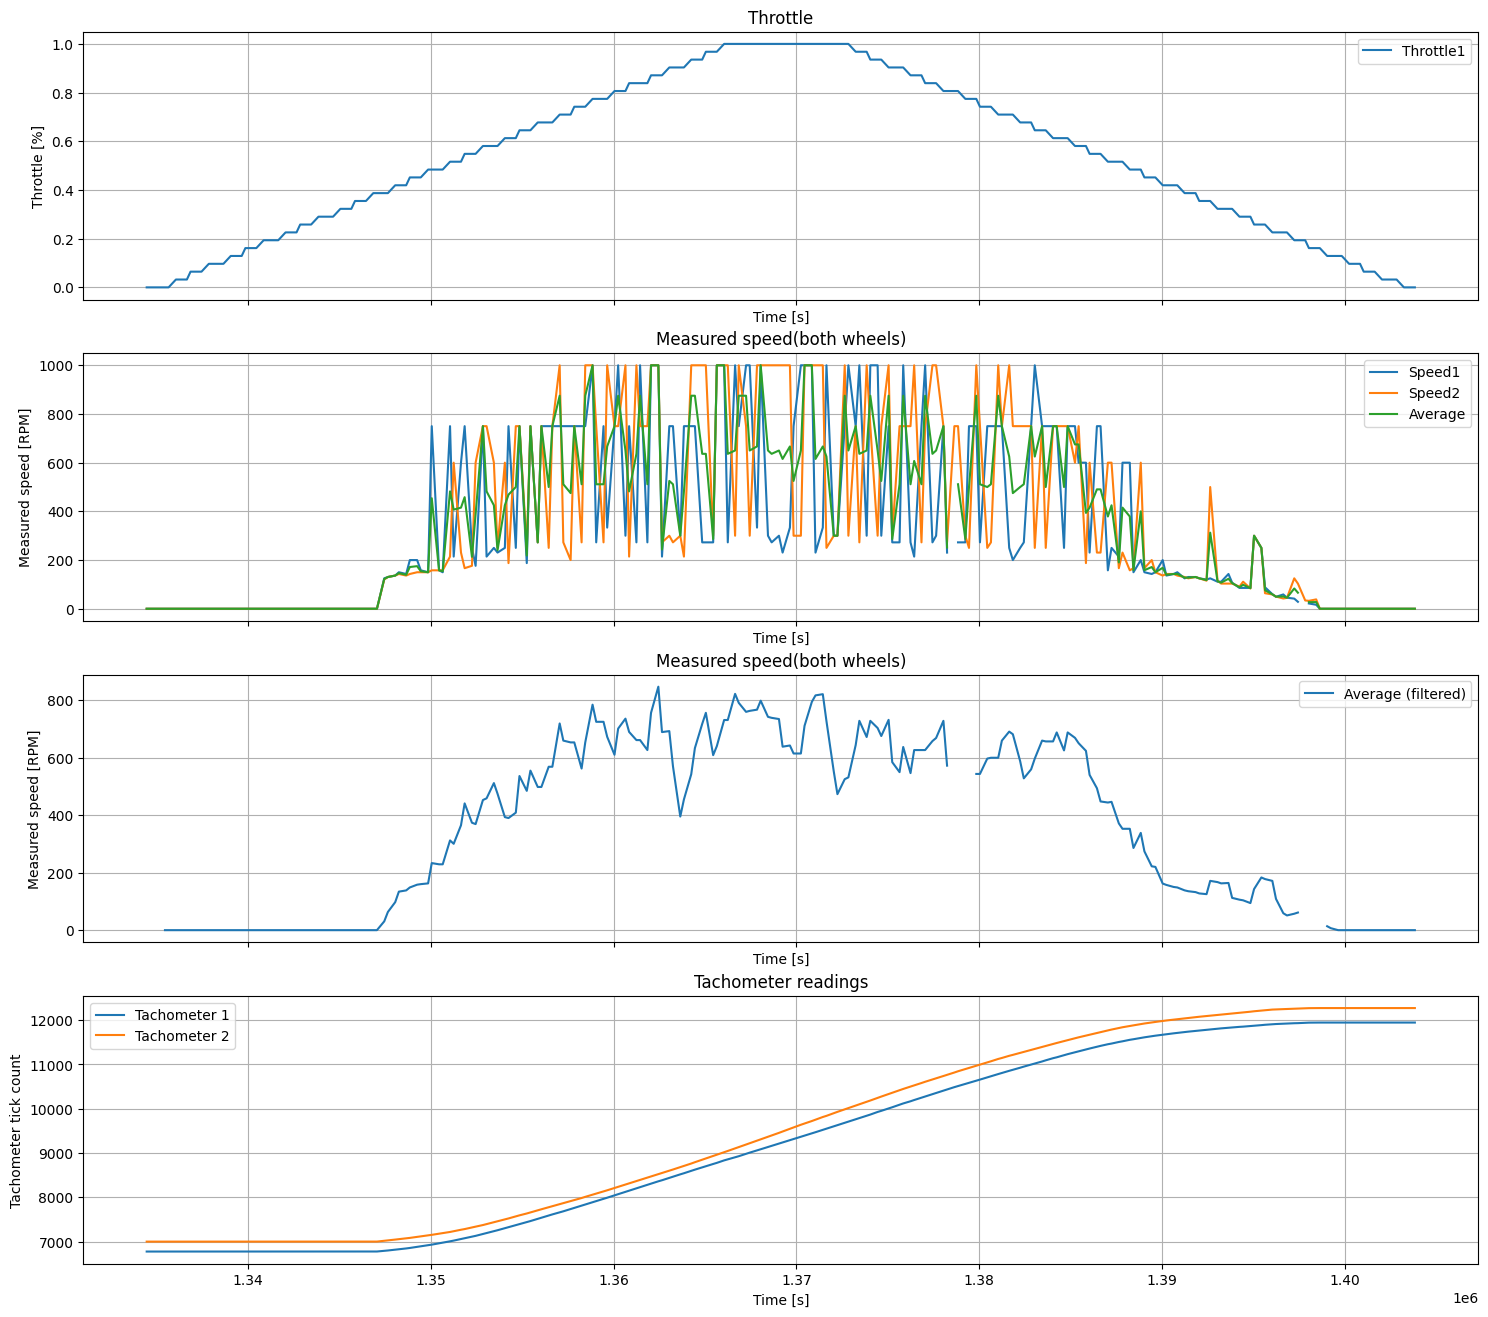

In [278]:
fig, axes = plt.subplots(4,1,figsize=(18,16),sharex=True)
axes[0].plot(motor_control_tm_df.OnBoardTime-motor_control_tm_df.OnBoardTime.iloc[0]/1000,motor_control_tm_df.Throttle1)
axes[0].set_title("Throttle")
axes[0].grid(which="Both")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Throttle [%]")
axes[0].legend(["Throttle1"])

axes[1].plot(motor_control_tm_df.OnBoardTime-motor_control_tm_df.OnBoardTime.iloc[0]/1000,motor_control_tm_df.MeasuredSpeed1)
axes[1].plot(motor_control_tm_df.OnBoardTime-motor_control_tm_df.OnBoardTime.iloc[0]/1000,motor_control_tm_df.MeasuredSpeed2)
axes[1].plot(motor_control_tm_df.OnBoardTime-motor_control_tm_df.OnBoardTime.iloc[0]/1000,motor_control_tm_df.AverageSpeed12)
axes[1].set_title("Measured speed(both wheels)")
axes[1].grid(which="Both")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Measured speed [RPM]")
axes[1].legend(["Speed1","Speed2","Average"])

axes[2].plot(motor_control_tm_df.OnBoardTime-motor_control_tm_df.OnBoardTime.iloc[0]/1000,motor_control_tm_df.AverageSpeed12.rolling(4).mean())
axes[2].set_title("Measured speed(both wheels)")
axes[2].grid(which="Both")
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Measured speed [RPM]")
axes[2].legend(["Average (filtered)"])

axes[3].plot(motor_control_tm_df.OnBoardTime-motor_control_tm_df.OnBoardTime.iloc[0]/1000,motor_control_tm_df.Tachometer1)
axes[3].plot(motor_control_tm_df.OnBoardTime-motor_control_tm_df.OnBoardTime.iloc[0]/1000,motor_control_tm_df.Tachometer2)
axes[3].grid(which="Both")
axes[3].set_xlabel("Time [s]")
axes[3].set_ylabel("Tachometer tick count")
axes[3].legend(["Tachometer 1","Tachometer 2"])
axes[3].set_title("Tachometer readings");

### 4. PID motor control

In [279]:
vehicle.set_motor_control_mode(VehicleIF.MOTOR_MODE_ARM_PID)

Sent: 0x 40 3C 05 03 00 00 00 02 B5 0A  (10 bytes)


In [314]:
vehicle.print_telemetry()

General Telemetry
   TelemetryCycle: 2537
   OnBoardTime: 1522585
   ReceivedPackets: 335
   GeneralStatus: 0x01020002
   Debug1: 0x00000000
   Debug2: 0x00000000
Motor Telemetry
   TelemetryCycle: 2537
   OnBoardTime: 1522985
   Throttle1: 0.0
   Throttle2: 0.0
   Tachometer1: 12059
   Tachometer2: 12390
   Tachometer3: 1
   Tachometer4: 11080
   MeasuredSpeed1: 0.0
   MeasuredSpeed2: 0.0
   MeasuredSpeed3: 0.0
   MeasuredSpeed4: 0.0
   SetpointSpeed1: 500.0
   SetpointSpeed2: 0.0
   StatusFlags: 0x00000002


In [298]:
vehicle.set_motor_speeds(500.,0.,0x1)

Sent: 0x 40 3C 0D 02 00 00 00 01 43 FA 00 00 00 00 00 00 64 0A  (18 bytes)


## Telemetry analysis

The following tests use logged telemetry. Telemetry is received and saved to CSV files. Each telemetry report type is saved to its own file.

The following methods start and stop the logging of all received reports:

- `start_telemetry_csv_logging()`
- `stop_telemetry_csv_logging()`

In [ ]:
vehicle.start_telemetry_csv_logging()

In [ ]:
vehicle.stop_telemetry_csv_logging()

CSVs will be saved to the `capture_path` variable of the vehicle interface.

In [ ]:
!ls {vehicle.capture_path}

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

general_tm_df = pd.read_csv(os.path.join(vehicle.capture_path,"tctm.telemetry.GeneralTelemetry.csv"))
general_tm_df

In [ ]:
motor_control_tm_df = pd.read_csv(os.path.join(vehicle.capture_path,"tctm.telemetry.MotorControlTelemetry.csv"))
motor_control_tm_df

### Sending commands

In [ ]:
vehicle.set_motor_throttles(0.0,0.51,0x3)

In [ ]:
vehicle.set_motor_throttles(1.0,1.0,0x3)

In [ ]:
# Stop motors
vehicle.set_motor_throttles(0.0,0.,0x3)
vehicle.set_motor_speeds(0.0,0.,0x3)

In [ ]:
vehicle.set_motor_speeds(0.01,0.01,0x3)

In [ ]:
vehicle.set_pid_parameters(0.1,5.3,5.0)

In [ ]:
vehicle.set_motor_control_mode(0)   

## Checking received telemetry

In [ ]:
vehicle.print_telemetry()

## Teardown

In [ ]:
vehicle.shutdown()

# Work in progress

<hr/>